In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mesostat.stat.connectomics import offdiag, degree_out, weight, clustering_coefficient, similarity

Total number of connections in true matrix 58.0
Total number of connections in rand matrix 58


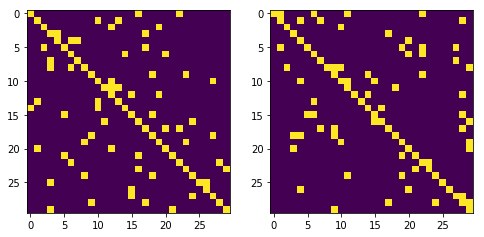

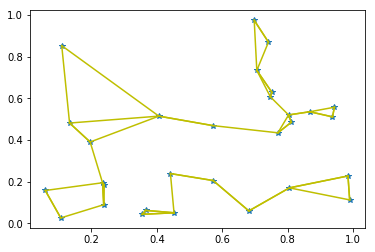

In [13]:
# Step 1: Construct a small-world network
nNode = 30
coords = np.random.uniform(0, 1, (nNode, 2))
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)
indices = indices[:, 1:]
connMat = np.eye(nNode, nNode)

for i in range(nNode):
    for j in indices[i]:
        connMat[i][j-1] = 1
        
# Step 2: Extract the number of connections, generate random network
def randomMatConn(mSrc):
    n = mSrc.shape[0]
    nConn = weight(mSrc)
    mat = np.eye(n) + np.random.uniform(0, 0.1, (n, n))
    return (mat > np.quantile(mat, 1 - (nConn + n) / (n**2) )).astype(int)

print("Total number of connections in true matrix", weight(connMat))
print("Total number of connections in rand matrix", weight(randomMatConn(connMat)))

fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(connMat)
ax[1].imshow(randomMatConn(connMat))
plt.show()

plt.figure()
plt.plot(*coords.T, '*')
for i in range(nNode):
    for j in indices[i]:
        x = [coords[i][0], coords[j][0]]
        y = [coords[i][1], coords[j][1]]
        plt.plot(x, y, color='y')

plt.show()

In [3]:
def nulltest(X, metric_func, rand_func, niter=1000):
    metricTrue = metric_func(X)
    metricRand = [metric_func(rand_func(X)) for i in range(niter)]
    
    plt.figure()
    plt.hist(metricRand, bins='auto')
    plt.axvline(x=metricTrue, linestyle='--', color='r')
    plt.show()
    
def similarity(mat):
    n = mat.shape[0]
    matND = offdiag(mat + np.random.uniform(0, 1.0E-10, (n,n)))
    
    corr = np.corrcoef(matND)
    corr[corr < 0] = 0
    
    rez = np.zeros(n)
    for i in range(n):
        norm = np.sum(matND[i])
        if norm == 0:
            rez[i] = 0
        else:
            rez[i] = matND[i].dot(corr[i]) / norm
    return rez

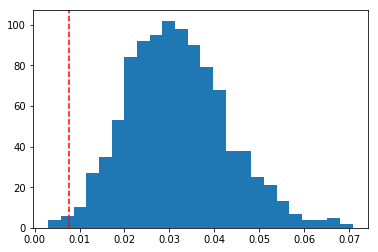

In [4]:
std_degree_out = lambda mat: np.std(degree_out(mat))
avg_cc = lambda mat: np.mean(clustering_coefficient(mat))
avg_similarity = lambda mat: np.mean(similarity(mat))

nulltest(connMat, avg_similarity, randomMatConn)